**<p align="center"><font size=5 color=#006600>Diplomado en Ciencia de Datos**

**<p align="center"><font size=5 color=#0000FF>Nota sobre el uso de la imagen euclidiana de la matriz de correlaciones para ver colinealidad entre variables**

**<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co

## <span style="color:blue">Asistentes</span>

1. Jessica López Mejia, jelopezme@unal.edu.co

# Gráfica de matriz de correlaciones *housing.csv* 

[Ver cuaderno ACP generalizado](https://github.com/AprendizajeProfundo/diplomado-ciencia-de-datos/blob/main/Metodos-exploratorios-mutlivariados/Cuadernos/ACPgeneralCienciaDatos.ipynb)

## Lectura de los datos
Descargados de: [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download)

In [1]:
casas=read.csv("../Datos/housing.csv")
str(casas)
dim(casas)
summary(casas)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : chr  "NEAR BAY" "NEAR BAY" "NEAR BAY" "NEAR BAY" ...


[1] 20640    10

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

No utilicé la variable *total_bedrooms* porqque tiene datos faltantes. 

In [2]:
cor(casas[,-c(5,10)])->V 

## Imagen euclidiana de la matriz de correlaciones

In [3]:
eigV <- eigen(V)

Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
colnames(G) = paste("G",1:nrow(V),sep="")
cat("\nCoordenadas de las variables en el primer plano")
t(round(G[,1:3],2))


Coordenadas de las variables en el primer plano

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
G1,0.22,-0.22,-0.47,0.95,0.92,0.94,0.18,0.13
G2,0.92,-0.95,0.05,-0.17,-0.14,-0.17,0.19,0.22
G3,-0.29,0.13,0.09,0.07,-0.14,-0.08,0.87,0.89


### Valores propios

vp,3.002413,1.905656,1.691708,0.8908552,0.2864732,0.1245627,0.05563427,0.04269775
vpacu,3.002413,4.908069,6.599777,7.4906321,7.7771053,7.9016680,7.95730225,8.00000000
poracu,37.530161,61.350859,82.497211,93.6329014,97.2138161,98.7708497,99.46627808,100.00000000


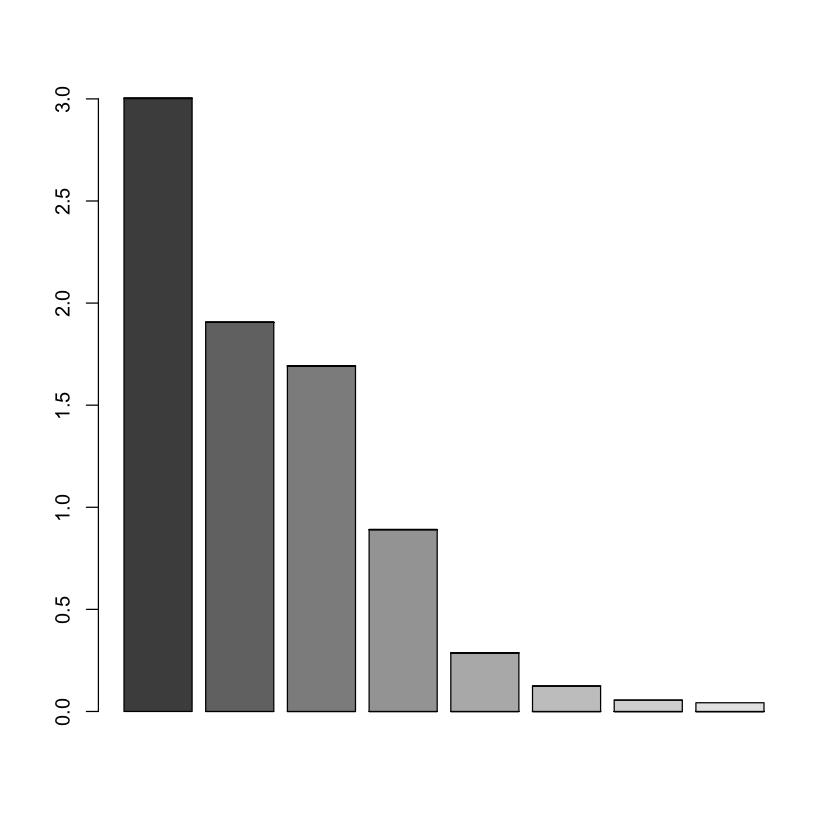

In [4]:
barplot(Lambda)
vp=diag(Lambda)
rbind(vp,vpacu=cumsum(vp), poracu=cumsum(vp)/sum(vp)*100)

### Círculos de corrlaciones con *plotcc{FactoClass}*

In [5]:
library(FactoClass)

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



#### Primer círculo de correlaciones

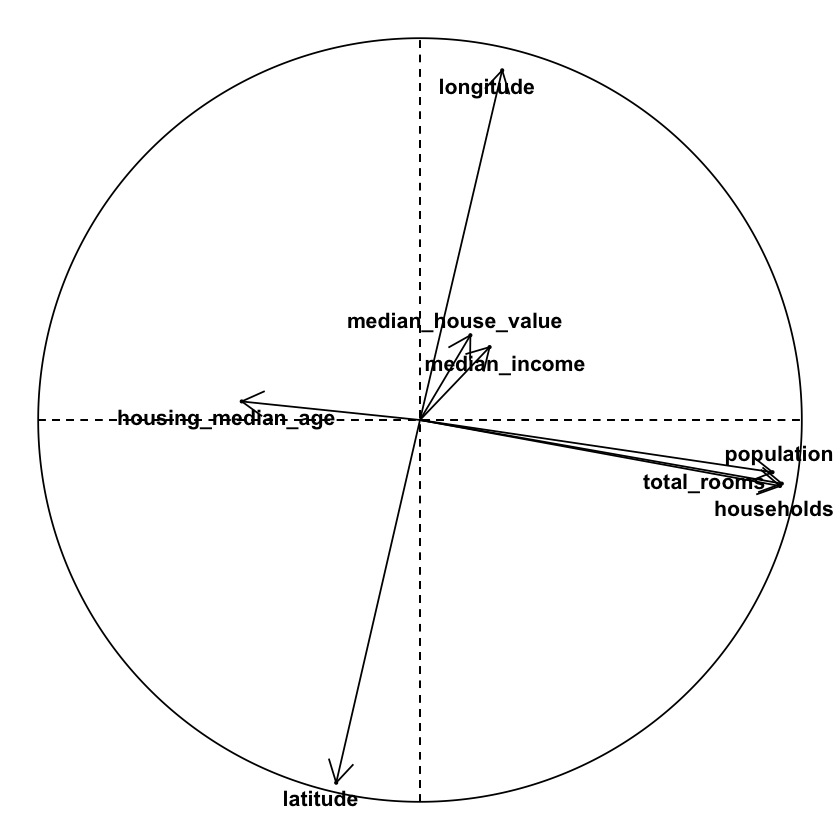

In [6]:
plotcc(G)

---
#### Círculo de correlaciones 1-3

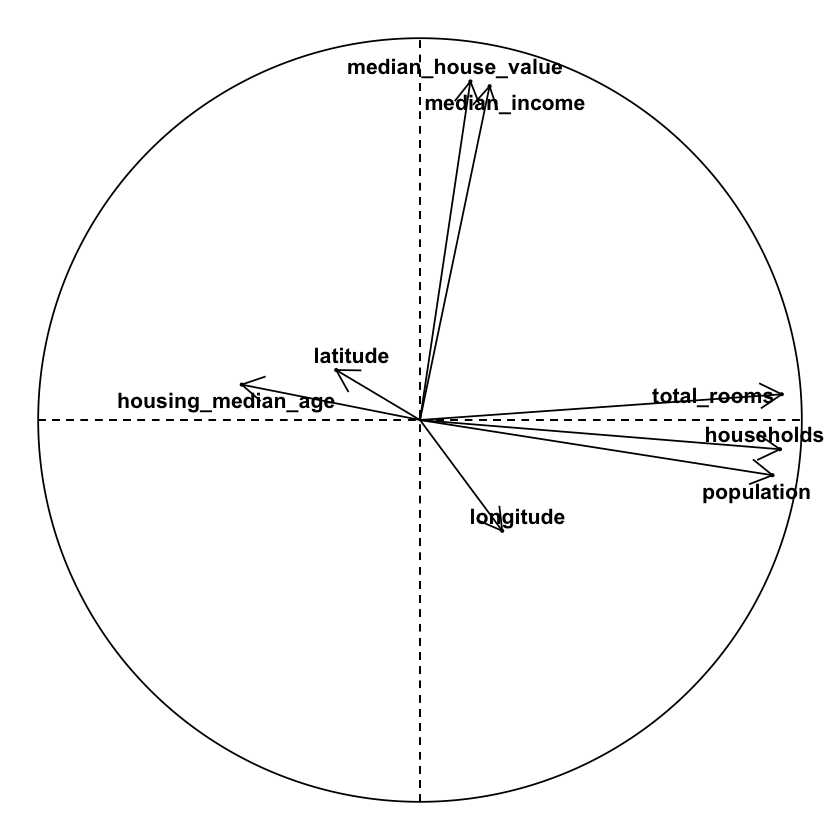

In [7]:
plotcc(G,1,3)

---
#### Círculo de correlaciones 2-3

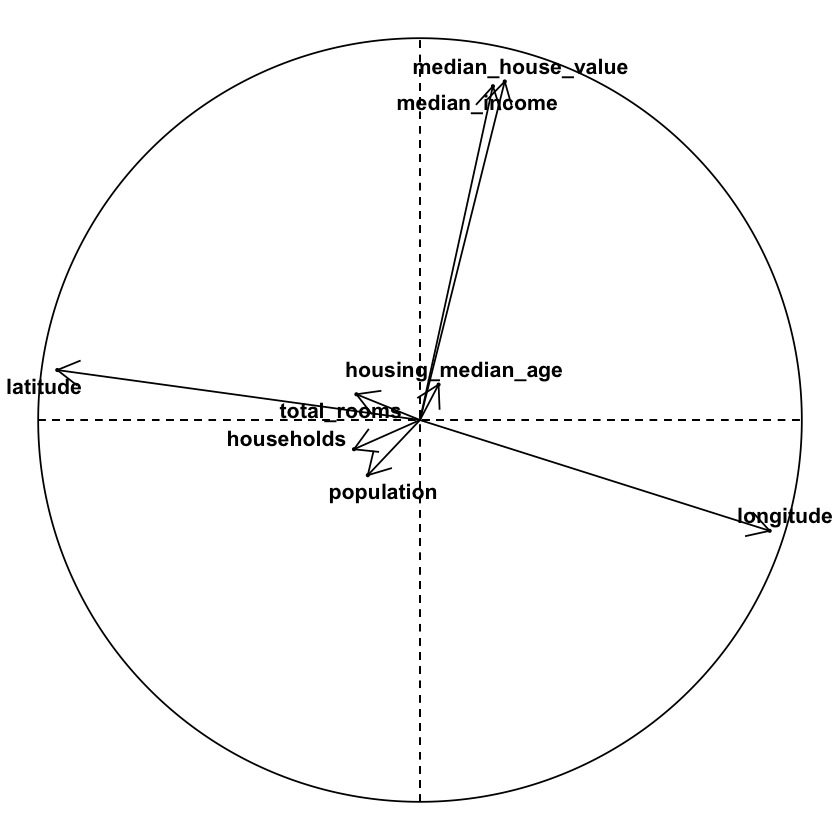

In [8]:
plotcc(G,2,3)